<a href="https://colab.research.google.com/github/alekhyakm/Bikesharingregression/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# Objective:
Importants of planning new bike rental stations.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Library and connecting drive

In [ ]:
# Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [ ]:
# Load the dataset
SeoulBikeData = pd.read_csv('/content/drive/MyDrive/Datasets/SeoulBikeData.csv',sep=',',encoding='latin')


# Print the first 5 rows of the dataframe.
SeoulBikeData.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
SeoulBikeData.shape

(8760, 14)

# Exploratory Data Analysis(EDA)

In [ ]:
# Renaming the columns names

SeoulBikeData.rename({"Temperature(°C)": "Temperature",  
                      "Functioning Day":"Functioning_Day",
           "Humidity(%)": "Humidity",  
           "Wind speed (m/s)": "Wind_speed",
           "Visibility (10m)": "Visibility",
           "Dew point temperature(°C)": "Dew_point_temperature",
           "Solar Radiation (MJ/m2)": "Solar_Radiation",
           "Snowfall (cm)": "Snowfall",
           "Rainfall(mm)": "Rainfall",
           "Rented Bike Count": "Rented_Bike_Count"},  
          axis = "columns", inplace = True) 

In [ ]:
SeoulBikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [ ]:
# Checking for missing values in the data
SeoulBikeData.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

We can say that we do not hve any missing values in this data

# Box plot for Dependent variable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


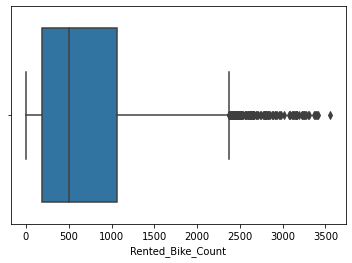

In [ ]:
sns.boxplot(SeoulBikeData['Rented_Bike_Count'])

# Exploring Catagorical Variables

Text(0, 0.5, 'Counts')

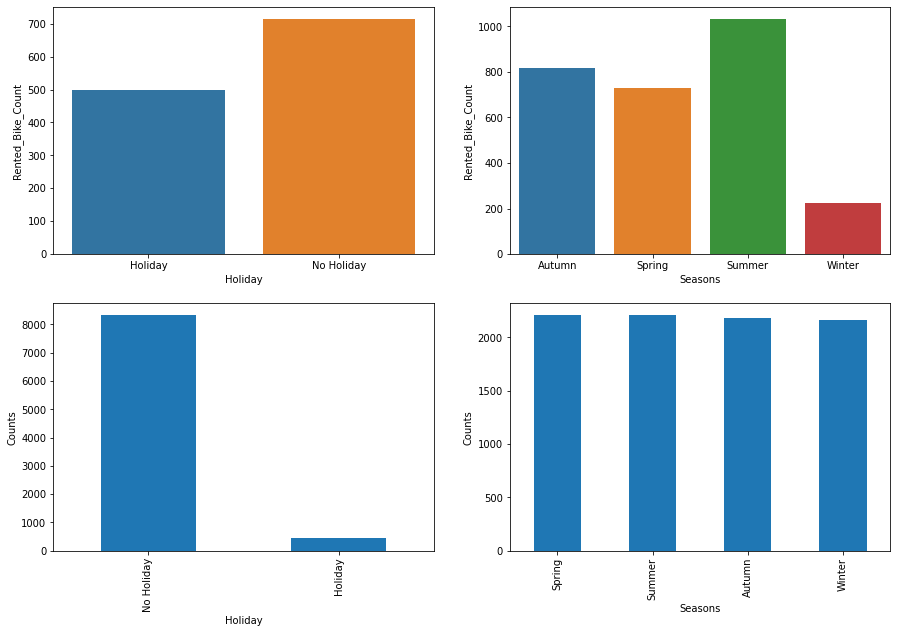

In [ ]:
Holiday_rent = pd.DataFrame(SeoulBikeData.groupby('Holiday').agg({'Rented_Bike_Count':'mean'}))
Season_rent = pd.DataFrame(SeoulBikeData.groupby('Seasons').agg({'Rented_Bike_Count':'mean'}))

# Bike rents in Seasons and holidays
fig, ax = plt.subplots(2,2,figsize=(15,10))
ax1=plt.subplot(2, 2,1)
sns.barplot(x=Holiday_rent.index, y = Holiday_rent['Rented_Bike_Count'])
ax1=plt.subplot(2, 2,2)
sns.barplot(x=Season_rent.index, y = Season_rent['Rented_Bike_Count'])

# How many Total Seasons and Holidays
ax1=plt.subplot(2, 2,3)
SeoulBikeData['Holiday'].value_counts().plot(kind='bar')
plt.xlabel('Holiday')
plt.ylabel('Counts')
ax1=plt.subplot(2, 2,4)
SeoulBikeData['Seasons'].value_counts().plot(kind='bar')
plt.xlabel('Seasons')
plt.ylabel('Counts')

We are given the data of one year which include many weather factors such as seasons , humidity etc. From the above data, we observe that large number of bikes are being rented when there is a working day/No Holiday and more often in summer season. Even in general also, bikes are being rented more in the working day itself regardless of the seasons.

# Exploring Numerical Variables

In [ ]:
numerical_features = ['Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Solar_Radiation',
       'Rainfall', 'Snowfall']

# List of colors in the color palettes
rgb_values = sns.color_palette("Set1", 9)
# Map continents to the colors
color_map = dict(zip(numerical_features, rgb_values))

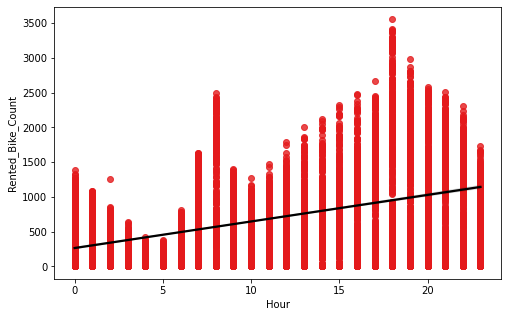

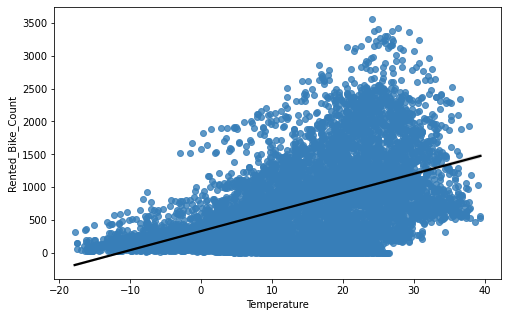

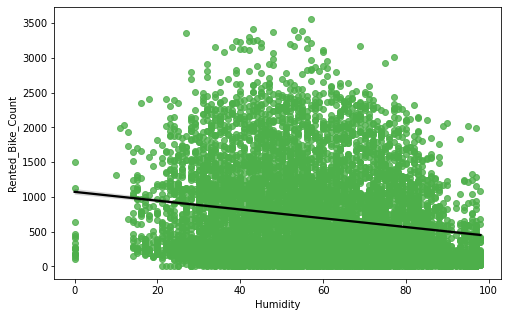

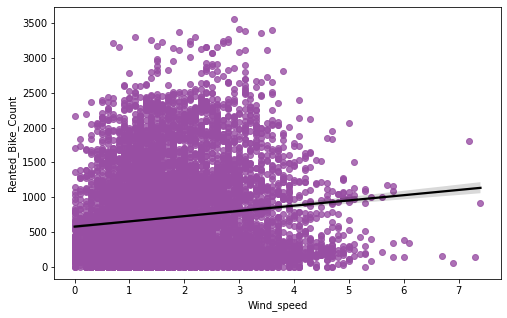

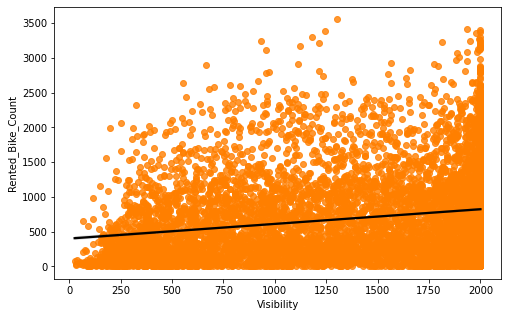

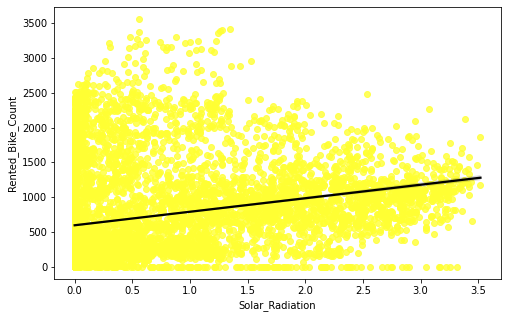

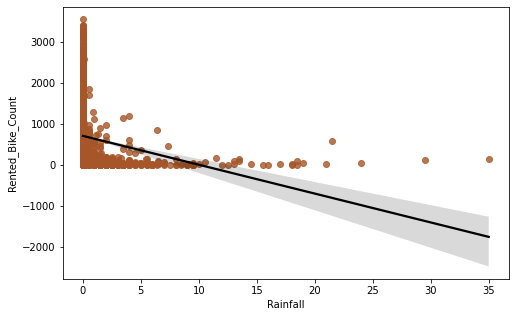

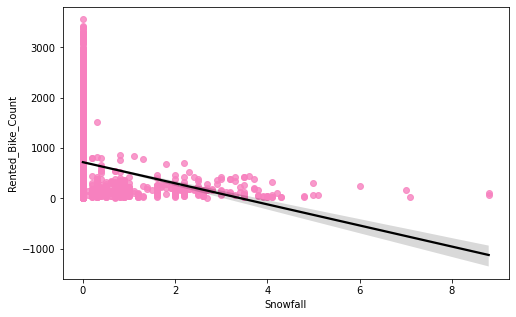

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)
for col, key in zip(numerical_features, color_map):
  plt.figure()
  sns.regplot(x=SeoulBikeData[col], y = SeoulBikeData['Rented_Bike_Count'],scatter_kws={"color": color_map[key]}, line_kws={"color": "black"})

# Hour:
There must be high demand during the office timings around 8 A.M. and 8 P.M., also for early morning and late evening we are having a relatably different trends. And, definately low demand between 8 A.M. and 8 P.M.

# Temperature:
In general, temperature has negative correlation with the bike demands. So, as the temperature increases, the bike count also increases.

# Humidity:
Humidity acts as a deterrent to a bike ride. The bike count decreases when the humidity increases.

# Wind Speed:
Due to Wind speed , there is certain increase in the bike count but the change is very small.

# Visibility:
If there is low visibility, people won't prefer to ride the bike. So,as the visibility increases , the number of bike count also increases.

# Rainfall and Snowfall:
If there is rainfall/Snowfall, people don't prefer to travel out. And, hence the bike count decreases.

# Change in Bike Renting with Change in hours

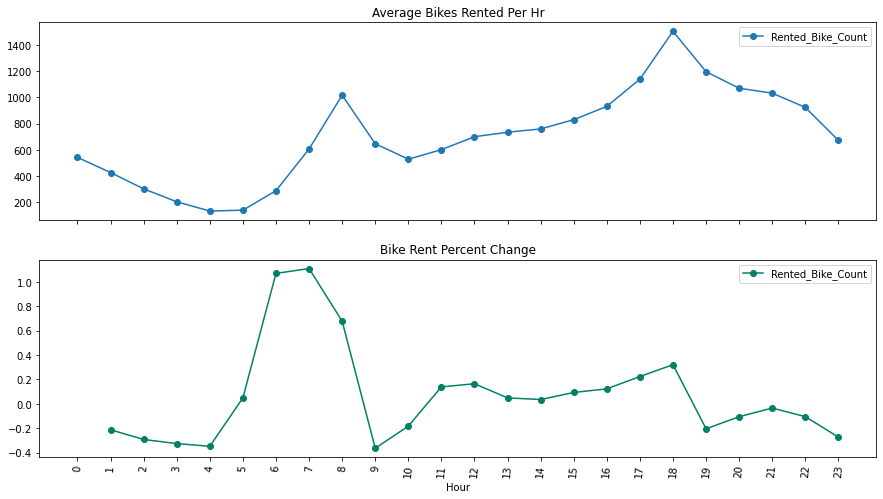

In [ ]:
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = SeoulBikeData.groupby('Hour')['Rented_Bike_Count'].mean()
pct_rent_hrs = SeoulBikeData.groupby('Hour')['Rented_Bike_Count'].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average rent over time(hrs)
ax1 = avg_rent_hrs.plot(legend=True,ax=axis1,marker='o',title="Average Bikes Rented Per Hr")
ax1.set_xticks(range(len(avg_rent_hrs)))
ax1.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85)

# plot precent change for rent over time(hrs)
ax2 = pct_rent_hrs.plot(legend=True,ax=axis2,marker='o',rot=85,colormap="summer",title="Bike Rent Percent Change")
#ax1.set_xticks(range(len(avg_rent_hrs)))

# To get the types of seasons in our dataset:

In [ ]:
SeoulBikeData.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

# To get the unique holiday in our dataset:

In [ ]:
SeoulBikeData.Holiday.unique()


array(['No Holiday', 'Holiday'], dtype=object)

# To get the unique number of hours in our dataset:

In [ ]:
SeoulBikeData.Hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

Since, we have zero count for our dependent variable when there is no functioning day. So, to keep our dataset more intact, dropping the data where there is no functioning day.

In [ ]:
SeoulBikeData = SeoulBikeData[SeoulBikeData['Functioning_Day'] == 'Yes']
SeoulBikeData.drop('Functioning_Day', axis = 1, inplace =True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
SeoulBikeData

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday


Assigning the categorical values to teh columns for building a model:

In [ ]:
def Holiday_label(row):
  if str(row) == 'Holiday':
    return 1
  else :
    return 0
  

In [ ]:
SeoulBikeData['Holiday']=SeoulBikeData.apply(lambda row : Holiday_label(row['Holiday']),axis=1)

SeoulBikeData['Holiday'].value_counts()

0    8057
1     408
Name: Holiday, dtype: int64

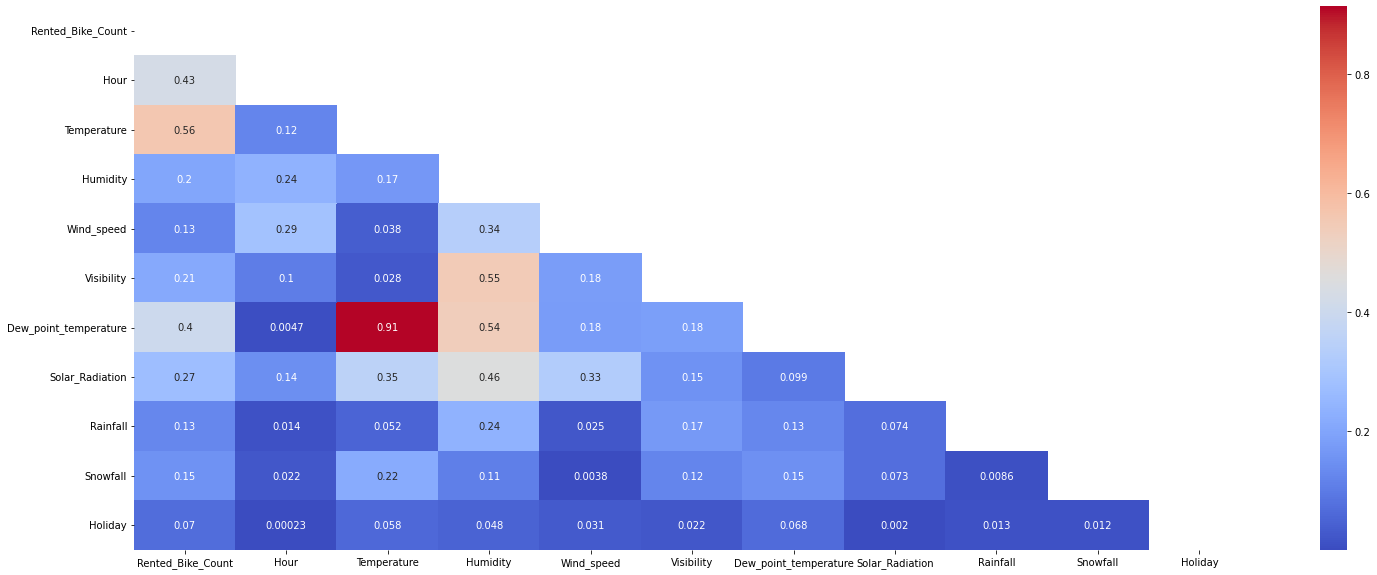

In [ ]:
plt.figure(figsize=(25,10))
cor=SeoulBikeData.corr().abs()
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor,mask=mask, annot=True, cmap='coolwarm')

From the above graph, we can see that Temperature and Dew_point_temperature is highy correlated, keeping the factor of 0.91 . And, then we have hour in the graph which is having good correlation with our dependent variable.

In [ ]:
SeoulBikeData.Seasons

0       Winter
1       Winter
2       Winter
3       Winter
4       Winter
         ...  
8755    Autumn
8756    Autumn
8757    Autumn
8758    Autumn
8759    Autumn
Name: Seasons, Length: 8465, dtype: object

In [ ]:
def Seasons_label(row):
  if str(row) == 'Winter':
    return 0
  elif str(row) == 'Autumn':
    return 1
  elif str(row) == 'Spring':
    return 2
  elif  str(row) == 'Summer':
    return 3
  

In [ ]:
SeoulBikeData['Seasons']=SeoulBikeData.apply(lambda row : Seasons_label(row['Seasons']),axis=1)

SeoulBikeData['Seasons'].value_counts()

3    2208
2    2160
0    2160
1    1937
Name: Seasons, dtype: int64

In [ ]:
SeoulBikeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8465 non-null   object 
 1   Rented_Bike_Count      8465 non-null   int64  
 2   Hour                   8465 non-null   int64  
 3   Temperature            8465 non-null   float64
 4   Humidity               8465 non-null   int64  
 5   Wind_speed             8465 non-null   float64
 6   Visibility             8465 non-null   int64  
 7   Dew_point_temperature  8465 non-null   float64
 8   Solar_Radiation        8465 non-null   float64
 9   Rainfall               8465 non-null   float64
 10  Snowfall               8465 non-null   float64
 11  Seasons                8465 non-null   int64  
 12  Holiday                8465 non-null   int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 925.9+ KB


In [ ]:
SeoulBikeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8465 non-null   object 
 1   Rented_Bike_Count      8465 non-null   int64  
 2   Hour                   8465 non-null   int64  
 3   Temperature            8465 non-null   float64
 4   Humidity               8465 non-null   int64  
 5   Wind_speed             8465 non-null   float64
 6   Visibility             8465 non-null   int64  
 7   Dew_point_temperature  8465 non-null   float64
 8   Solar_Radiation        8465 non-null   float64
 9   Rainfall               8465 non-null   float64
 10  Snowfall               8465 non-null   float64
 11  Seasons                8465 non-null   int64  
 12  Holiday                8465 non-null   int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 925.9+ KB


Identifying the outliers:

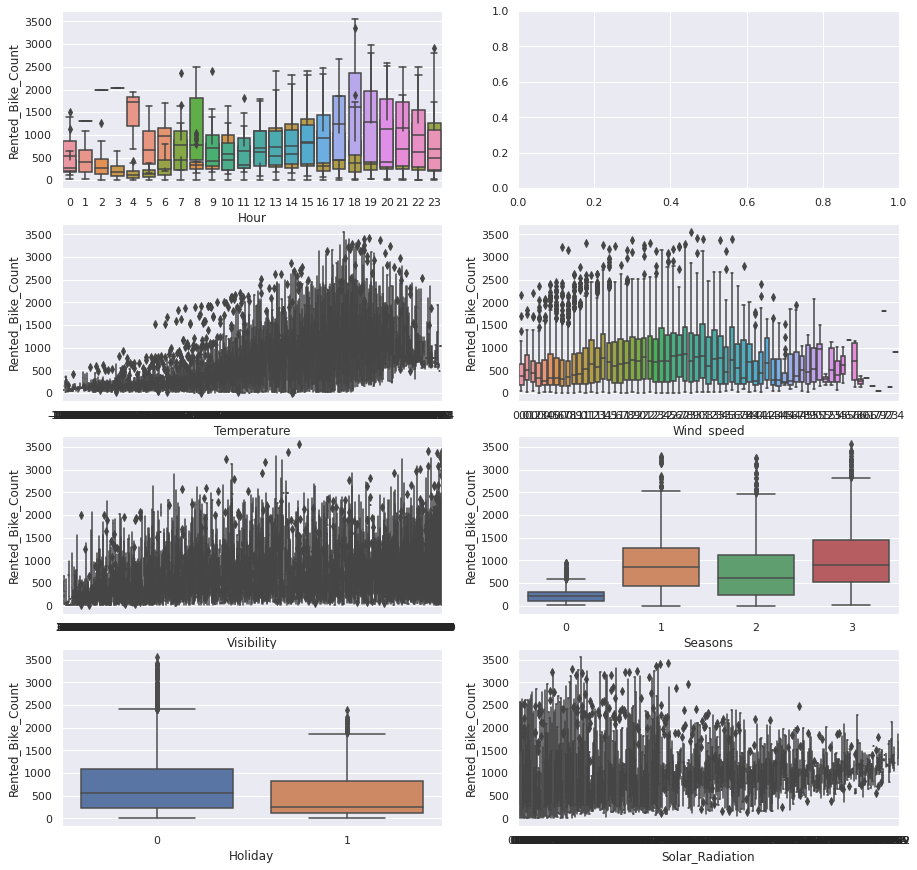

In [ ]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data=SeoulBikeData,y="Rented_Bike_Count",x="Humidity",orient="v",ax=axes[0][0])
sns.boxplot(data=SeoulBikeData,y="Rented_Bike_Count",x="Hour",orient="v",ax=axes[0][0])
sns.boxplot(data=SeoulBikeData,y="Rented_Bike_Count",x="Temperature",orient="v",ax=axes[1][0])
sns.boxplot(data=SeoulBikeData,y="Rented_Bike_Count",x="Wind_speed",orient="v",ax=axes[1][1])
sns.boxplot(data=SeoulBikeData,y="Rented_Bike_Count",x="Visibility",orient="v",ax=axes[2][0])
sns.boxplot(data=SeoulBikeData,y="Rented_Bike_Count",x="Seasons",orient="v",ax=axes[2][1])
sns.boxplot(data=SeoulBikeData,y="Rented_Bike_Count",x="Holiday",orient="v",ax=axes[3][0])
sns.boxplot(data=SeoulBikeData,y="Rented_Bike_Count",x="Solar_Radiation",orient="v",ax=axes[3][1])

In [ ]:
# Data for all the independent variables
SeoulBikeData = SeoulBikeData.drop(labels='Date',axis=1)
SeoulBikeData = SeoulBikeData.drop(labels='Dew_point_temperature',axis=1,)

In [ ]:
# Data for all the independent variables
X = SeoulBikeData.drop(labels='Rented_Bike_Count',axis=1)

# Data for the dependent variable
Y = SeoulBikeData['Rented_Bike_Count']

from sklearn.model_selection import train_test_split

Since , Date and Dew_point_temperature shows high correlation with our dependent variable, so dropping these two columns.

# Linear Regression

In [ ]:
# import libraray
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((6348, 10), (2117, 10), (6348,), (2117,))

In [ ]:
regressor.intercept_

449.33004053728746

In [ ]:
regressor.coef_

array([ 2.82772556e+01,  3.33357396e+01, -7.57490553e+00,  6.55798124e+00,
        2.73253606e-02, -8.56811366e+01, -6.43327747e+01,  1.83131441e+01,
       -9.89525856e+00, -1.27441560e+02])

In [ ]:
y_pred_train=regressor.predict(X_train)
y_pred_test=regressor.predict(X_test)


# Evaluation Matrix

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(Y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(Y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((Y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((Y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 198793.5341180045
RMSE : 445.8626852720515
MAE : 333.68919457334323
R2 : 0.5073055437091121
Adjusted R2 : 0.5049660638596776


The r2_score for the test set is 0.50. This means our linear model is performing not well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).





Text(0, 0.5, 'Predicted')

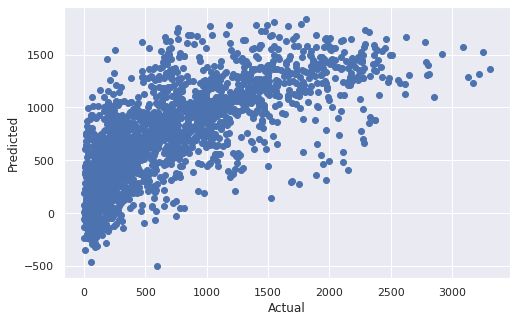

In [ ]:
plt.scatter(Y_test, y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')

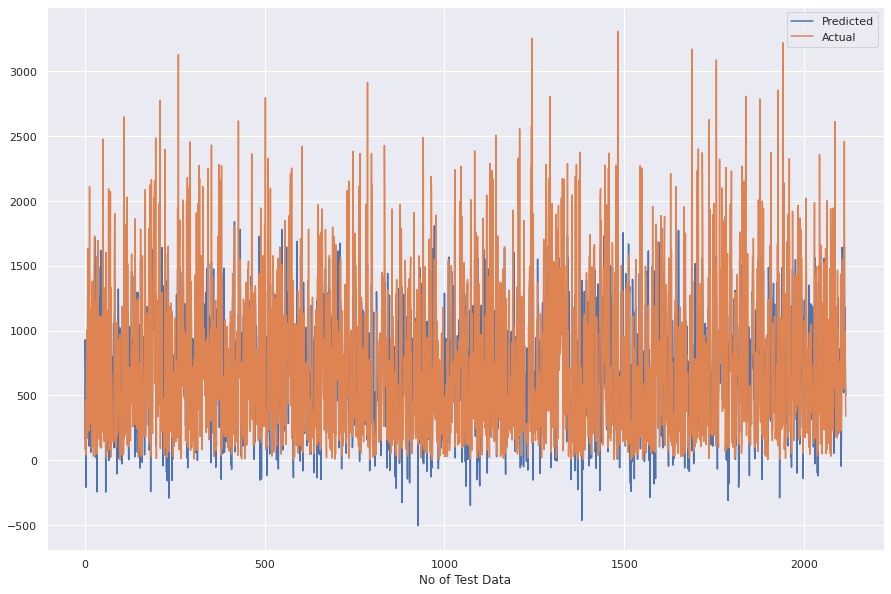

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# Lasso Regression

In [ ]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, Y_train)

Lasso(alpha=0.001)

In [ ]:
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
#calculate MSE
MSE_l= mean_squared_error(Y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(Y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((Y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((Y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((Y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 198793.663747306
RMSE : 445.86283064111325
MAE : 333.68926336070683
R2 : 0.5073052224328767
Adjusted R2 : 0.504965741057914


The r2_score for the test set is 0.50. This means our linear model is not performing well on the data

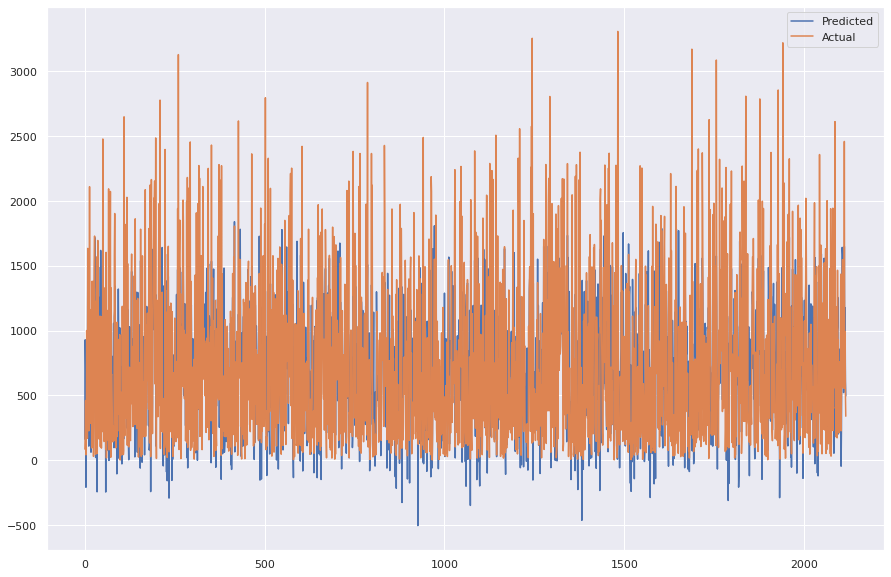

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# Ridge Rigression

In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
ridge = Ridge(alpha=30)
ridge.fit(X_train,Y_train)

Ridge(alpha=30)

In [ ]:
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
#calculate MSE
MSE_r= mean_squared_error(Y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(Y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((Y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((Y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((Y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 198890.40226455292
RMSE : 445.97130206388044
MAE : 333.76785647648927
R2 : 0.5070654634720594
Adjusted R2 : 0.5047248436404926


The r2_score for the test set is 0.50. This means our linear model is performing not well on the data.

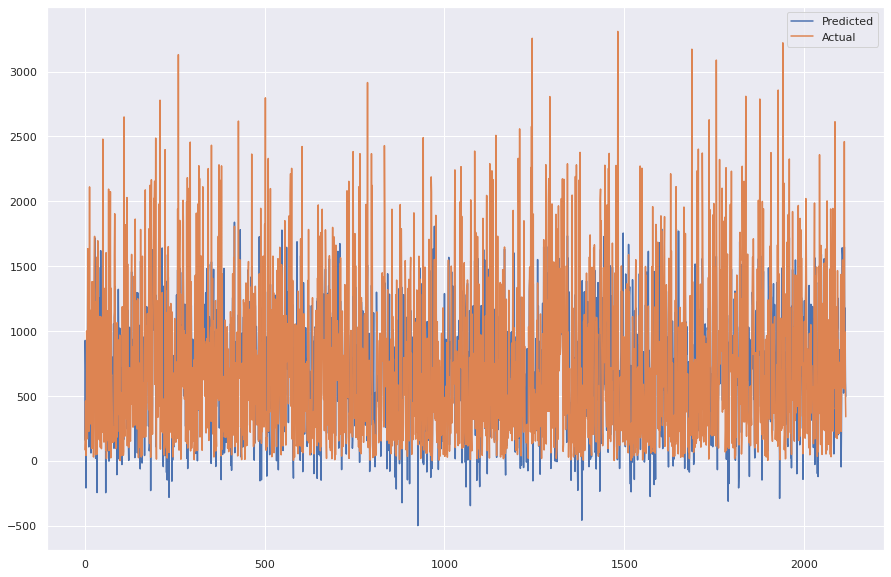

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()

In [ ]:
decision_regressor.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:

y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [ ]:
#calculate MSE
MSE_d= mean_squared_error(Y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(Y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((Y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((Y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((Y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 107746.765706188
RMSE : 328.24802467979606
MAE : 189.44402456306094
R2 : 0.7329579436160141
Adjusted R2 : 0.7316899376502781


The r2_score for the test set is 0.73. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

Text(0, 0.5, 'Predicted')

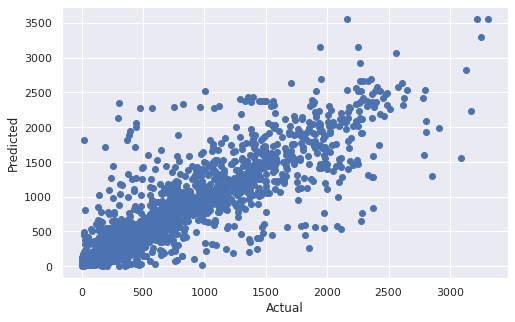

In [ ]:
plt.scatter(Y_test, y_pred_test_d )
plt.xlabel('Actual')
plt.ylabel('Predicted')

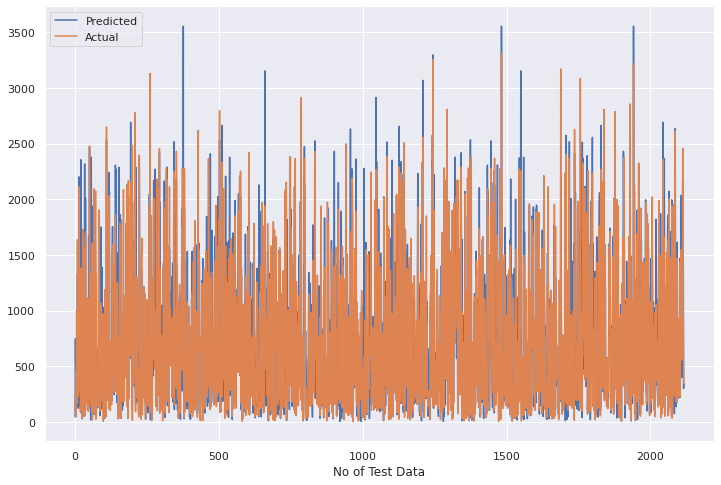

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(y_pred_test_d)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [ ]:
decision_regressor.feature_importances_

array([0.31911697, 0.35460142, 0.1205457 , 0.02085463, 0.01878592,
       0.10170304, 0.01944881, 0.00113874, 0.04121089, 0.00259389])

In [ ]:
features = X.columns
importances = decision_regressor.feature_importances_
indices = np.argsort(importances)

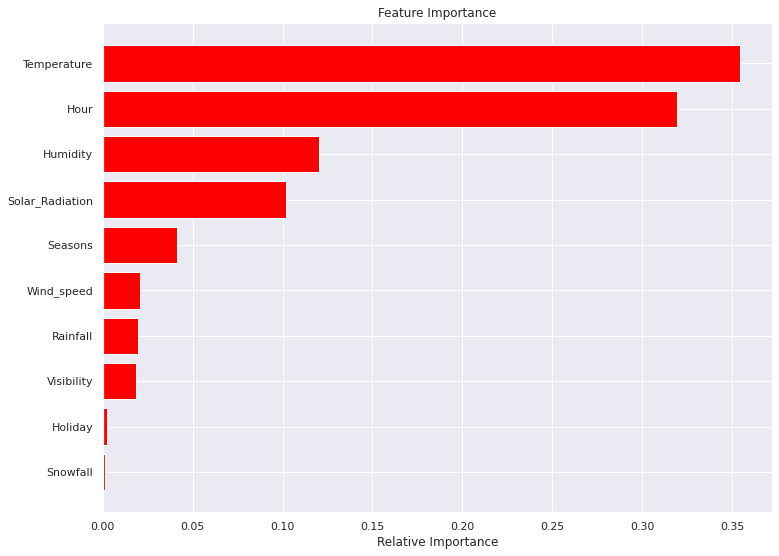

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# GradiantBoosting Algorithm

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

In [ ]:
gb_model.fit(X_train,Y_train)

GradientBoostingRegressor()

In [ ]:
y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)

In [ ]:
#calculate MSE
MSE_gb= mean_squared_error(Y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(Y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((Y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((Y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((Y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 67926.21260456894
RMSE : 260.62657693445027
MAE : 174.08113472803188
R2 : 0.8316501161086994
Adjusted R2 : 0.8308507339439734


The r2_score for the test set is 0.83. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

Text(0, 0.5, 'Predicted')

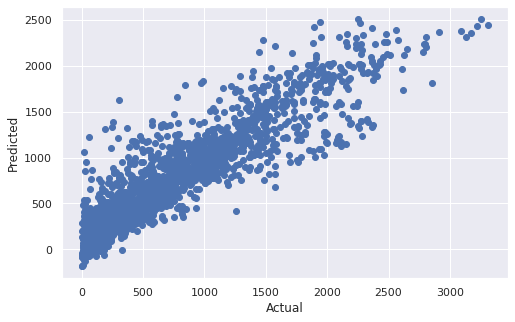

In [ ]:
plt.scatter(Y_test, y_pred_test_g)
plt.xlabel('Actual')
plt.ylabel('Predicted')

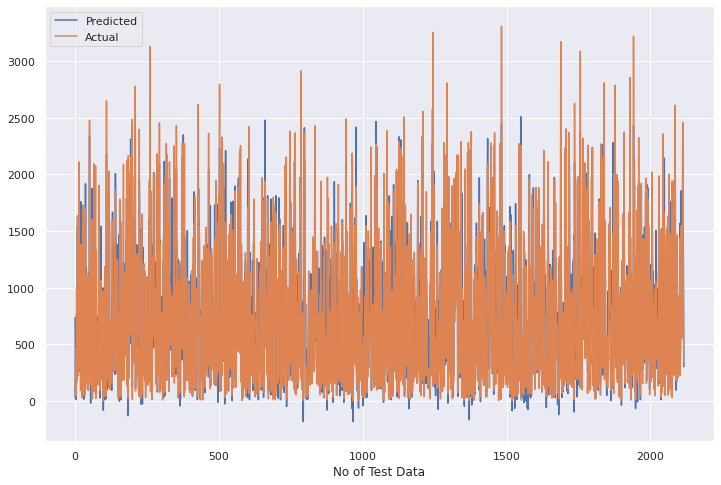

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(y_pred_test_g)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [ ]:
gb_model.feature_importances_

array([3.48911883e-01, 3.80380451e-01, 1.01856532e-01, 2.23323930e-03,
       1.27926257e-03, 8.53522527e-02, 3.78235698e-02, 1.20110177e-04,
       4.05369031e-02, 1.50579682e-03])

In [ ]:
features = X.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

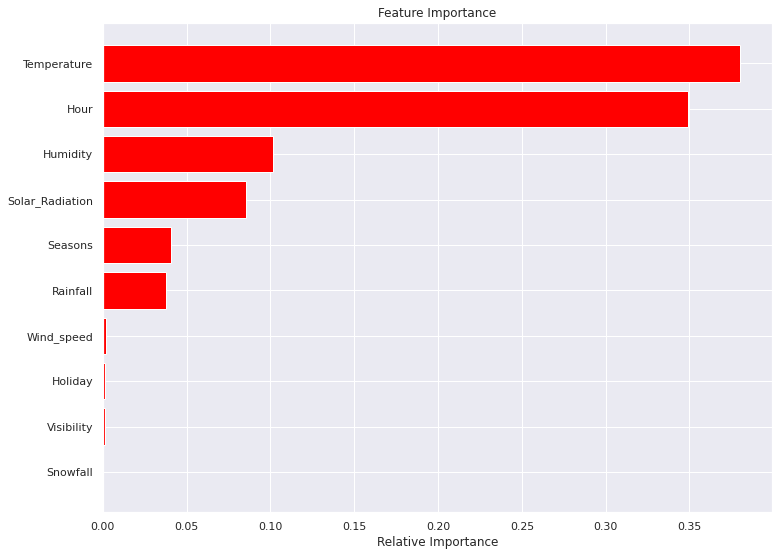

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# RandomForest Algorithm

Parameter tuning on ‘n_estimators’, ‘max_depth’ and ‘min_samples_leaf’ parameters.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

In [ ]:
rf_model.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [ ]:
#calculate MSE
MSE_rf= mean_squared_error(Y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(Y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((Y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((Y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((Y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 59872.59966513935
RMSE : 244.6887812408639
MAE : 150.3739489844119
R2 : 0.8516103752085458
Adjusted R2 : 0.8509057711022235


The r2_score for the test set is 0.85. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

Text(0, 0.5, 'Predicted')

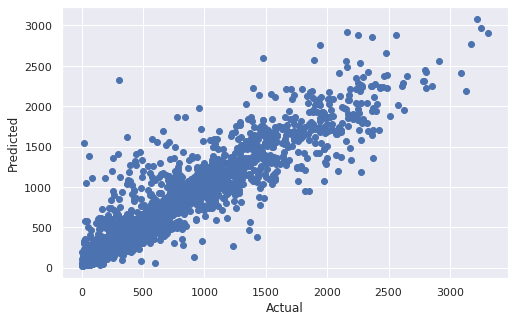

In [ ]:
plt.scatter(Y_test, y_pred_test_r)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

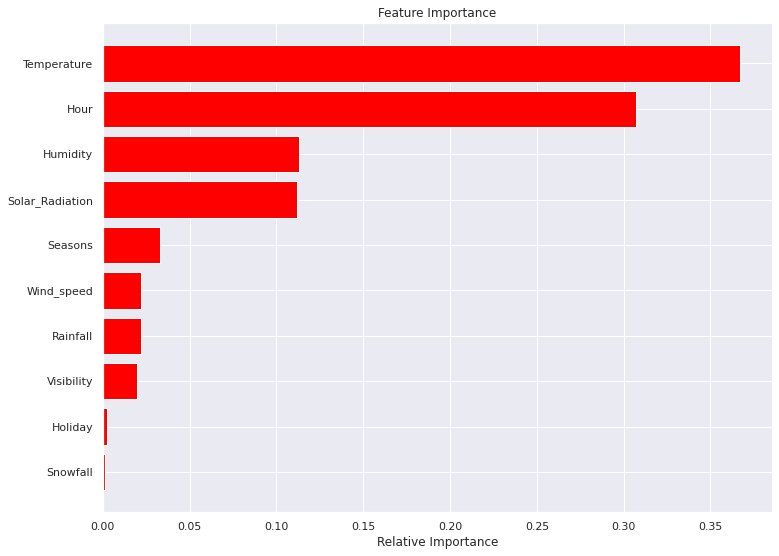

In [ ]:
#Plot the figure
plt.figure(figsize=(12,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# XGBoost

In [ ]:
import xgboost as xgb

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33, random_state=42)
dreg= xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 9,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)
dreg.fit(X_train, Y_train)



[05:22:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.7, eta=0.004, max_depth=9, min_child_weight=10)

In [ ]:
y_pred_test_xg = dreg.predict(X_test)
y_pred_train_xg = dreg.predict(X_train)

In [ ]:
print("Model Score:",dreg.score(X_test,y_pred_test_xg))

#calculate MSE
MSE_xg= mean_squared_error(Y_test, y_pred_test_xg)
print("MSE :",MSE_xg)

#calculate RMSE
RMSE_xg=np.sqrt(MSE_xg)
print("RMSE :",RMSE_xg)


#calculate MAE
MAE_xg= mean_absolute_error(Y_train, y_pred_train_xg)
print("MAE :",MAE_xg)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_xg= r2_score(Y_test, y_pred_test_xg)
print("R2 :",r2_xg)
Adjusted_R2_xg=(1-(1-r2_score(Y_test, y_pred_test_xg))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(Y_test, y_pred_test_xg))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 1.0
MSE : 54287.031544213925
RMSE : 232.9957758076612
MAE : 76.27350263159609
R2 : 0.8662260483087465
Adjusted R2 : 0.8657453657658387


The r2_score for the test set is 0.86. This means our linear model is performing well on the data. 

In [ ]:
features = X_train.columns
importances = dreg.feature_importances_
indices = np.argsort(importances)

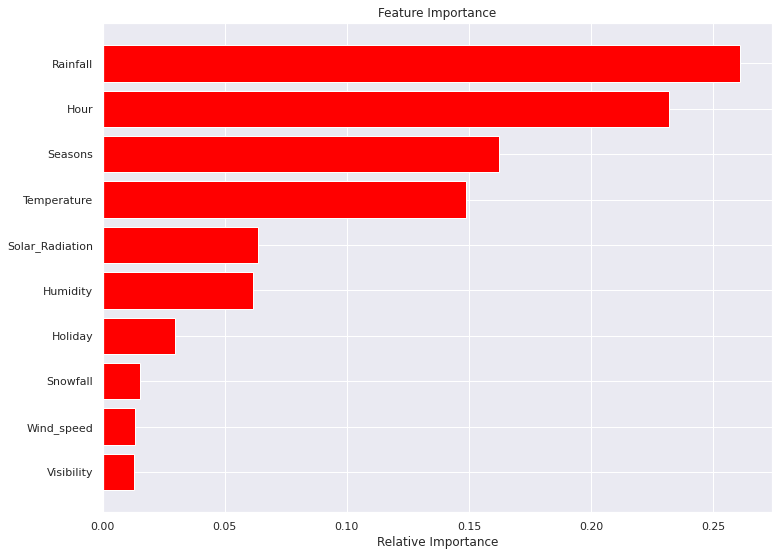

In [ ]:
#Plot the figure
plt.figure(figsize=(12,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# Grid Search CV on XGboost algorithm

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb

xgb = xgb.XGBRegressor(random_state=0)

In [ ]:
params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          
          }

In [ ]:
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X_train, Y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[05:22:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:31] WARNING: /workspace/src/objective/regre

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
                         'min_child_weight': [10, 20]},
             verbose=1)

In [ ]:
reg_gs.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'eta': 0.004,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 7,
 'min_child_weight': 10,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
reg_optimal_model =reg_gs.best_estimator_

In [ ]:
train_preds = reg_optimal_model.predict(X_train)
test_preds = reg_optimal_model.predict(X_test)

In [ ]:
reg_optimal_model.score(X_test,Y_test)


0.8714153208387021

# For Test dataset:

In [ ]:
#Find R-squared value
r2 = r2_score(Y_test, test_preds)
print('r2:',r2)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(Y_test, test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('adj_r2:',adj_r2)
MSE  = mean_squared_error(Y_test, test_preds)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
MAE  = mean_absolute_error(Y_test, test_preds)
print("MAE :" , MAE)

r2: 0.8714153208387021
adj_r2: 0.8709532846218092
MSE : 52181.164161486064
RMSE : 228.43196834393837
MAE : 140.82378907916626


# Conclusion:
When we compare the root mean squared error and mean absolute error of all the models, the XGBoost model has less root mean squared error and mean absolute error, ending with the accuracy of 87% . So, finally this model is best for predicting the bike rental count on daily basis. As we can see the total amount of bike rentals increases with the temperature per month. Whereas it seems that the rentals are independent of the windspeed and the humidity, because they are almost constant over the months. This also confirms on the one hand the high correlation between rentals and temperature and on the other hand that nice weather could be a good predictor.So people mainly rent bikes on nice days and nice temperature. This could be important of planning new bike rental stations.